In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data
from skimage.color import rgb2gray
import cv2
import os
import git
from pathlib import Path

CWD = os.getcwd()
ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots")

In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from reporting import *
os.chdir(CWD)
np.random.seed(0)

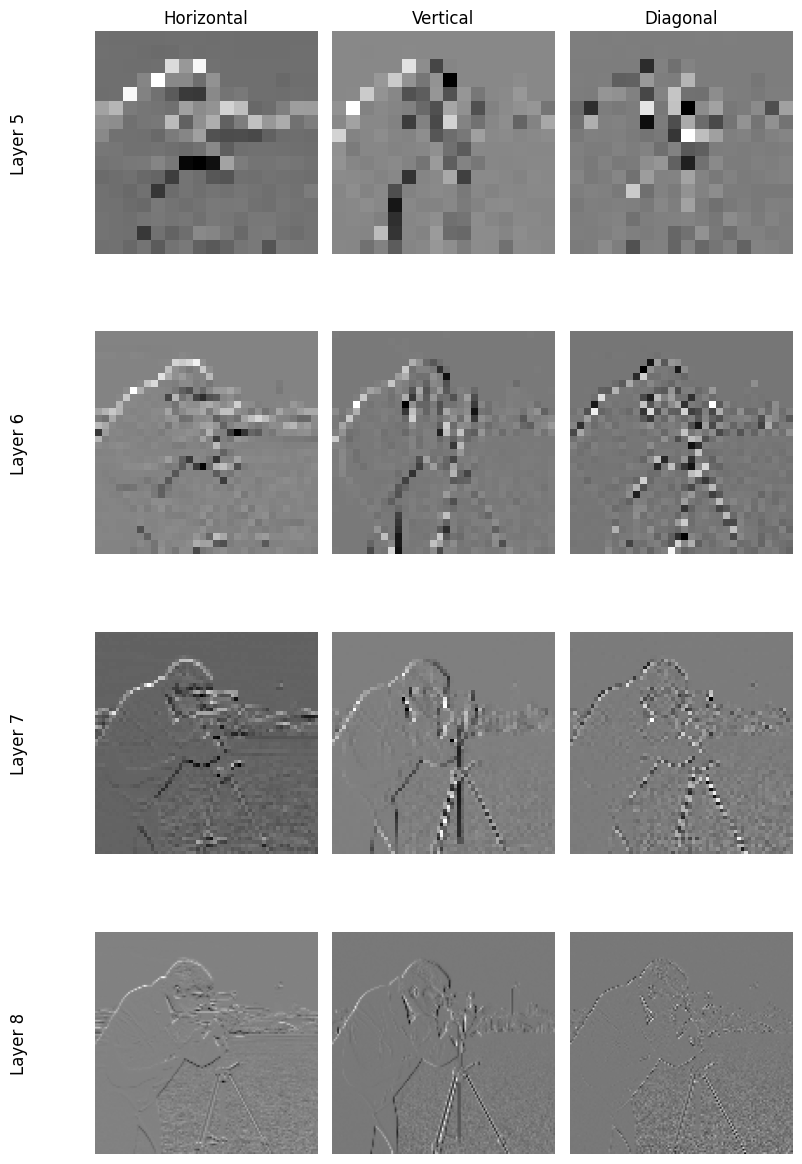

In [3]:
labels = ['Horizontal', 'Vertical', 'Diagonal']
image = pywt.data.camera()
coeffs = pywt.wavedec2(image, 'haar')
num_layers = len(coeffs) - 1

fig, axes = plt.subplots(num_layers, 3, figsize=(8, 3 * num_layers))
for idx, layer in enumerate(coeffs[1:]):
    for j, (arr, label) in enumerate(zip(layer, labels)):
        ax = axes[idx, j]
        ax.imshow(arr, cmap='gray')
        ax.set_title(label, fontsize=12)
        ax.axis('off')
    # Add a text label on the leftmost plot
    axes[idx, 0].text(-0.3, 0.5, f'Layer {idx + 1}', va='center', ha='right',
                      rotation=90, transform=axes[idx, 0].transAxes, fontsize=12)

for ax_row in axes[:4]:
    for ax in ax_row:
        ax.remove()
for ax_row in axes[8:]:
    for ax in ax_row:
        ax.remove()
for ax_row in axes[5:8]:
    for ax in ax_row:
        ax.set_title("")
plt.tight_layout()
plt.show()



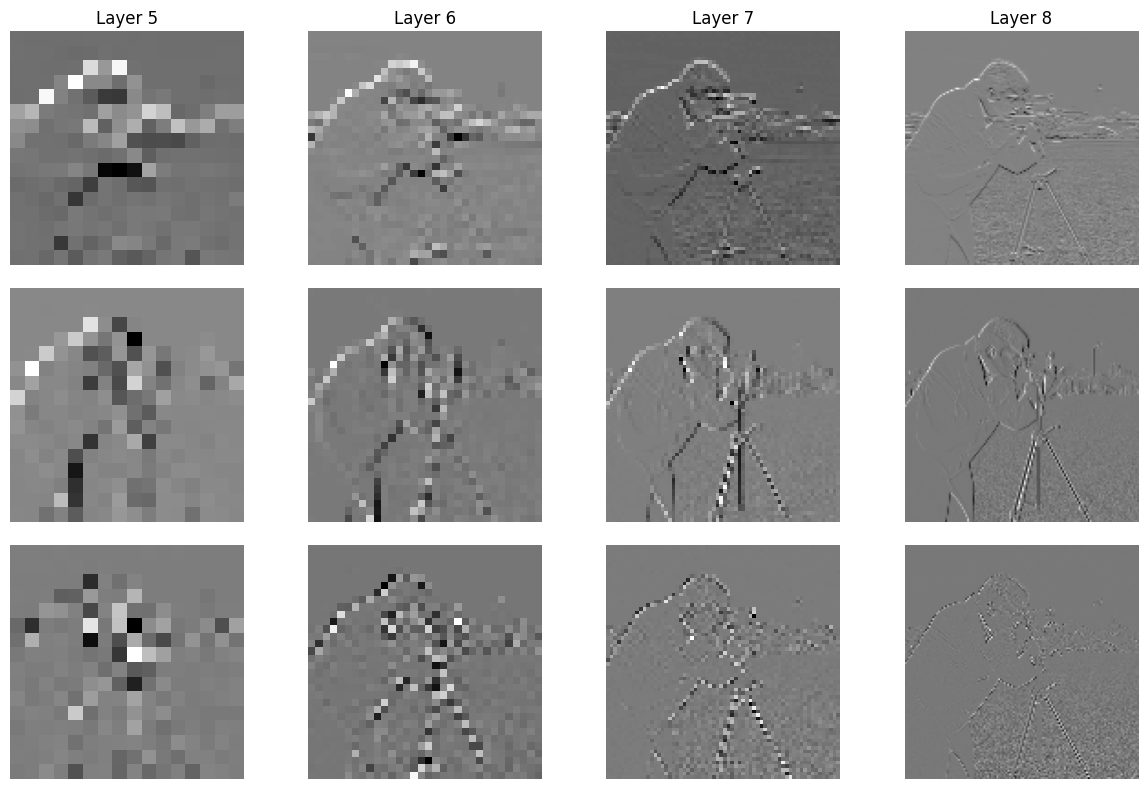

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

labels = ['Horizontal', 'Vertical', 'Diagonal']
image = pywt.data.camera()
coeffs = pywt.wavedec2(image, 'haar')
num_layers = len(coeffs) - 1

fig, axes = plt.subplots(3, num_layers, figsize=(3 * num_layers, 8))  # 3 rows (directions), cols = layers

for idx, layer in enumerate(coeffs[1:]):  # loop over layers (columns)
    for j, (arr, label) in enumerate(zip(layer, labels)):  # loop over directions (rows)
        ax = axes[j, idx]
        ax.imshow(arr, cmap='gray')
        ax.axis('off')

        # Only set row labels on leftmost column
        if idx == 6:
            ax.set_ylabel(label, fontsize=12, rotation=0, labelpad=40, va='center')
            

# Add layer titles as column headers
for idx in range(num_layers):
    axes[0, idx].set_title(f'Layer {idx + 1}', fontsize=12)
for ax_row in axes:
    for ax in ax_row[:4]:
        ax.remove()
    for ax in ax_row[8:]:
        ax.remove()
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.1)  # reduce spacing
plt.show()


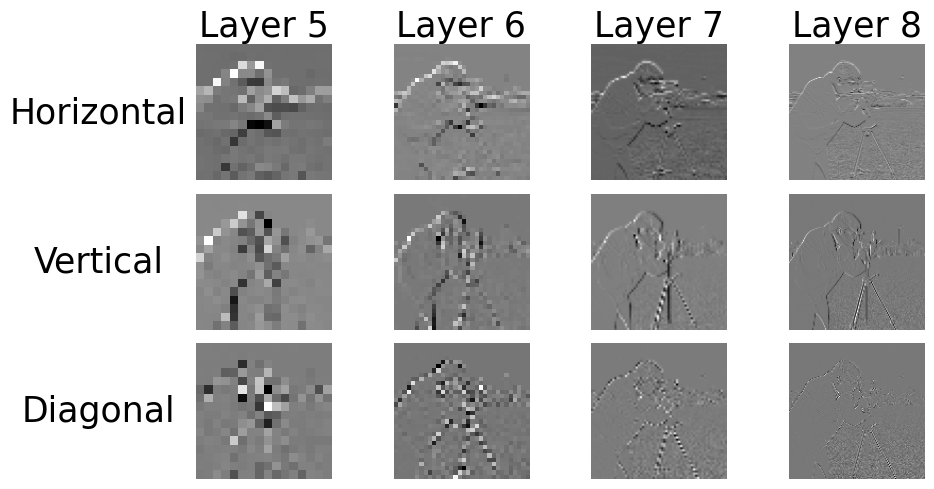

Saving figure to: /Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/publication/paper/final_plots/wavelet_example.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

FONTSIZE = 25
labels = ['Horizontal', 'Vertical', 'Diagonal']
image = pywt.data.camera()
coeffs = pywt.wavedec2(image, 'haar')
num_layers = len(coeffs) - 1

fig, axes = plt.subplots(3, num_layers, figsize=(2 * num_layers, 5))

for idx, layer in enumerate(coeffs[1:]):
    for j, (arr, label) in enumerate(zip(layer, labels)):
        ax = axes[j, idx]
        ax.imshow(arr, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)  # removes box outline

        if idx == 4:
            ax.set_ylabel(label, fontsize=FONTSIZE, rotation=0, labelpad=70, va='center')

# Add column titles
for idx in range(num_layers):
    axes[0, idx].set_title(f'Layer {idx + 1}', fontsize=FONTSIZE)

# Remove unwanted columns (layers 1–4 and 9+)
for j in range(3):
    for i in list(range(0, 4)) + list(range(8, num_layers)):
        axes[j, i].remove()

plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.show()

if SAVE_FIGS:
    print("Saving figure to:", os.path.join(plots_path, "wavelet_example.png"))
    fig.savefig(os.path.join(plots_path, "wavelet_example.jpg"), bbox_inches='tight', dpi=DPI)
